### Problem statement - 1

In [1]:
# Loading of dataset using pandas
import pandas as pd

data_df = pd.read_csv(r'./delivery_time.csv')

# First look of data
data_df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


#### Exploratory Data Analysis (EDA) 

In [2]:
print('1. Shape of Dataset (Rows, Columns): ', data_df.shape)

1. Shape of Dataset (Rows, Columns):  (21, 2)


In [3]:
print('2. Technical summary of Dataset: \n')
print(data_df.info())

2. Technical summary of Dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes
None


In [4]:
print('3. Statistical summary of Dataset: \n', data_df.describe())

3. Statistical summary of Dataset: 
        Delivery Time  Sorting Time
count      21.000000     21.000000
mean       16.790952      6.190476
std         5.074901      2.542028
min         8.000000      2.000000
25%        13.500000      4.000000
50%        17.830000      6.000000
75%        19.750000      8.000000
max        29.000000     10.000000


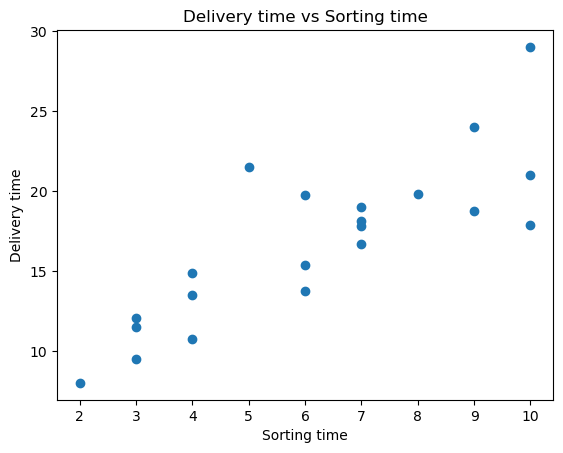

In [5]:
# Visualization of dataset
import matplotlib.pyplot as plt
plt.scatter(data=data_df, x='Sorting Time', y='Delivery Time')
plt.title('Delivery time vs Sorting time')
plt.xlabel('Sorting time')
plt.ylabel('Delivery time')
plt.show()

In [6]:
print('Correlation b/w Delivery time and Sorting time: \n', 
      data_df['Delivery Time'].corr(data_df['Sorting Time']))

Correlation b/w Delivery time and Sorting time: 
 0.8259972607955326


<Axes: >

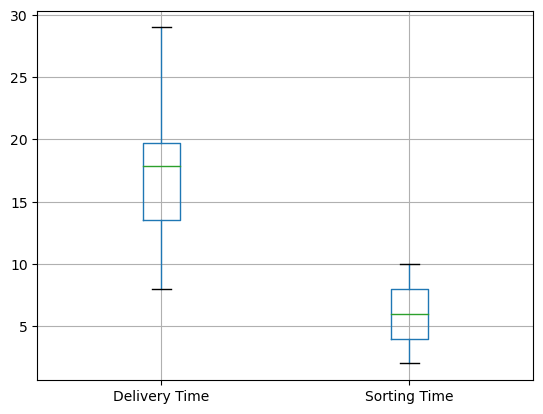

In [7]:
# Presence of outliers in dataset
data_df.boxplot()

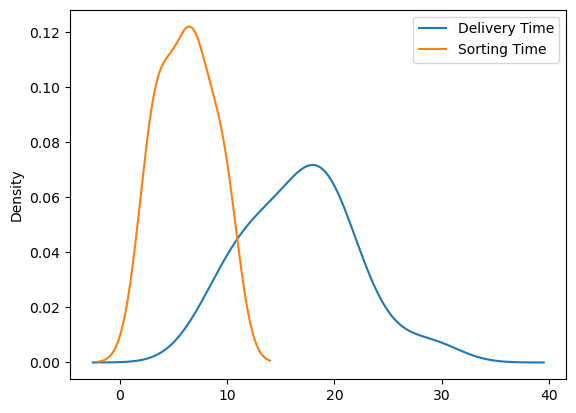

In [8]:
# Distribution of dataset
import matplotlib.pyplot as plt
data_df.plot(kind='kde')
plt.show()

In [9]:
# Skewness in dataset
print('Skewness in Delivery time: ', data_df['Delivery Time'].skew())
print('Skewness in Sorting time: ', data_df['Sorting Time'].skew())

Skewness in Delivery time:  0.3523900822831107
Skewness in Sorting time:  0.047115474210530174


#### Machine Learning model and workflow

In [10]:
#1. Extraction of features

# Features - Sorting time
X = pd.DataFrame(data_df['Sorting Time']) # X data must be in DataFrame form

# Target value - Delivery time
y = data_df['Delivery Time']

In [11]:
#2. Training ML model - 
# a) Linear regression
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X, y)

LinearRegression()

In [12]:
# Score, intercept and coefficient of linear model
from sklearn.metrics import mean_squared_error

y_predicts = lin_model.predict(X)
RMSE = mean_squared_error(y_predicts, y)**0.5

print('Score for linear regression model: ', lin_model.score(X, y))
print('Root Mean squared Error: ', RMSE)
print('Linear model intercept: ', lin_model.intercept_)
print('Linear model coefficient: ', lin_model.coef_)

Score for linear regression model:  0.6822714748417231
Root Mean squared Error:  2.7916503270617654
Linear model intercept:  6.58273397199706
Linear model coefficient:  [1.6490199]


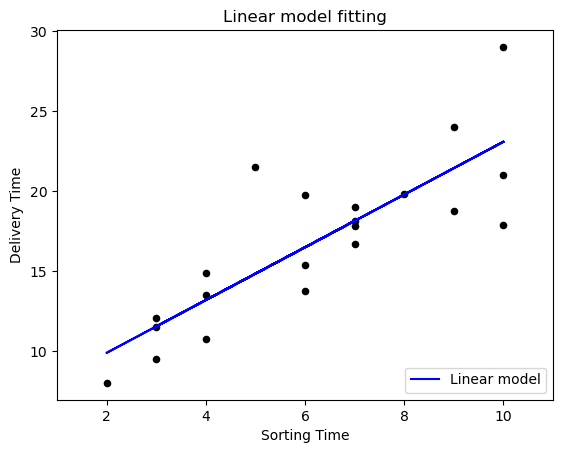

In [13]:
# Visualization of Linear model and dataset

# Dataset plotting
data_df.plot(kind='scatter', x='Sorting Time', y='Delivery Time', color='black', xlim=(1, 11))

# Linear model plotting

plt.plot(X, y_predicts, color='blue', label='Linear model')
plt.title('Linear model fitting')
plt.legend(loc=4)
plt.show()

In [22]:
#b) Polynomial regression fitting 
import numpy as np

X_poly = pd.DataFrame([data_df['Sorting Time'],
                       data_df['Sorting Time'] ** 2,
                       data_df['Sorting Time'] ** 3,
                      data_df['Sorting Time'] ** 4,
                      data_df['Sorting Time'] ** 5,
                      data_df['Sorting Time'] ** 6,
                      data_df['Sorting Time'] ** 7]).T
y_poly = y

# Polynomial model initialization
poly_model = LinearRegression()
poly_model.fit(X_poly, y_poly)
y_poly_predicts = poly_model.predict(X_poly)
RMSE2 = mean_squared_error(y_poly_predicts, y_poly)**0.5
# Score, intercept and coefficient of linear model
print('Score for Polynomial regression model: ', poly_model.score(X_poly, y_poly))
print('Root Mean squared Error: ', RMSE2)
print('Polynomial model intercept: ', poly_model.intercept_)
print('Polynomial model coefficient: ', poly_model.coef_)

Score for Polynomial regression model:  0.7379853695949694
Root Mean squared Error:  2.5351034525681806
Polynomial model intercept:  -777.6849327787329
Polynomial model coefficient:  [ 1.24581326e+03 -7.98572930e+02  2.69152794e+02 -5.16060245e+01
  5.65495320e+00 -3.29550920e-01  7.91625486e-03]


C:\Users\umesh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


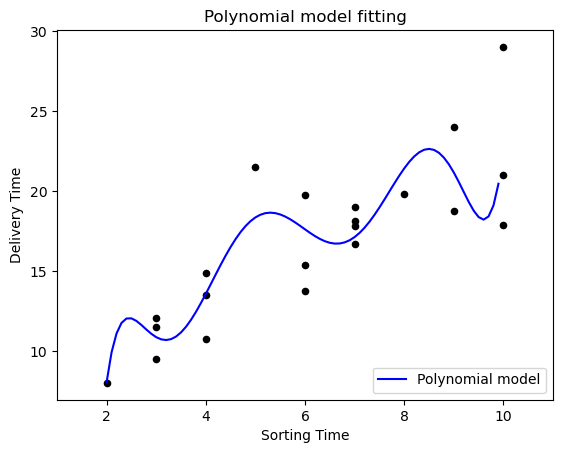

In [20]:
# Visualization of Polynomial model and dataset

# Dataset plotting
data_df.plot(kind='scatter', x='Sorting Time', y='Delivery Time', color='black', xlim=(1, 11))

# Polynomial model plotting
poly_range = np.arange(2, 10, 0.1)

X_poly_range = pd.DataFrame([poly_range,
                       poly_range ** 2,
                      poly_range ** 3,
                      poly_range ** 4,
                      poly_range ** 5,
                      poly_range ** 6,
                      poly_range ** 7]).T

y_poly_predicts = poly_model.predict(X_poly_range)

plt.plot(poly_range, y_poly_predicts, color='blue', label='Polynomial model')
plt.title('Polynomial model fitting')
plt.legend(loc=4)
plt.show()

#### Various Transformations

In [25]:
#1) Linear regression fitting by standard transformation 
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(pd.DataFrame(y))

# linear model initialization
lin_std_model = LinearRegression()
lin_std_model.fit(X_scaled, y_scaled)
y_std_predicts = lin_std_model.predict(X_scaled)
RMSE_std = mean_squared_error(y_std_predicts, y_scaled)**0.5

# Score, intercept and coefficient of linear model
print('Score for standard scaled linear regression model: ', lin_std_model.score(X_scaled, y_scaled))
print('Root Mean squared Error: ', RMSE_std)

Score for standard scaled linear regression model:  0.6822714748417231
Root Mean squared Error:  0.563674130290079


In [17]:
#2) Linear regression fitting by log transformation 
import numpy as np

X_log = np.log(X)
y_log = np.log(y)

# linear model initialization
log_std_model = LinearRegression()
log_std_model.fit(X_log, y_log)
y_log_predicts = log_std_model.predict(X_log)
RMSE_log = mean_squared_error(y_log_predicts, y_log)**0.5

# Score, intercept and coefficient of linear model
print('Score for log scaled linear regression model: ', log_std_model.score(X_log, y_log))
print('Root Mean squared Error: ', RMSE_log)

Score for log scaled linear regression model:  0.77216134926874
Root Mean squared Error:  0.14823312083501494


In [24]:
#3) Linear regression fitting by square root transformation 
import numpy as np

X_sqrt = np.sqrt(X)
y_sqrt = np.sqrt(y)

# linear model initialization
sqrt_std_model = LinearRegression()
sqrt_std_model.fit(X_sqrt, y_sqrt)
y_sqrt_predicts = sqrt_std_model.predict(X_sqrt)
RMSE_sqrt = mean_squared_error(y_sqrt_predicts, y_sqrt)**0.5

# Score, intercept and coefficient of linear model
print('Score for Square root scaled linear regression model: ', sqrt_std_model.score(X_sqrt, y_sqrt))
print('Root Mean squared Error: ', RMSE_sqrt)

Score for Square root scaled linear regression model:  0.7292011987544664
Root Mean squared Error:  0.3179102135134033


In [26]:
print('R2 score for differenet regression models - ')
print('Linear regression model: ', lin_model.score(X, y))
print('Polynomial regression model of degree 7: ', poly_model.score(X_poly, y_poly))
print('Standsr Scaled linear regression model: ', lin_std_model.score(X_scaled, y_scaled))
print('Log scaled linear regression model: ', log_std_model.score(X_log, y_log))
print('Square root scaled linear regression model: ', sqrt_std_model.score(X_sqrt, y_sqrt))
print()
print('Root Mean squared Error for different models - ')
print('Linear regression: ', RMSE)
print('Polynomial regression: ', RMSE2)
print('Standard linear regression: ', RMSE_std)
print('Log scaled linear regression: ', RMSE_log)
print('Square root scaled linear regression: ', RMSE_sqrt)

R2 score for differenet regression models - 
Linear regression model:  0.6822714748417231
Polynomial regression model of degree 7:  0.7379853695949694
Standsr Scaled linear regression model:  0.6822714748417231
Log scaled linear regression model:  0.77216134926874
Square root scaled linear regression model:  0.7292011987544664

Root Mean squared Error for different models - 
Linear regression:  2.7916503270617654
Polynomial regression:  2.5351034525681806
Standard linear regression:  0.563674130290079
Log scaled linear regression:  0.14823312083501494
Square root scaled linear regression:  0.3179102135134033


### Problem statement - 2

In [ ]:
2) Salary_hike -> Build a prediction model for Salary_hike

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary 
transformations and select the best model using R or Python.

In [27]:
# Loading dataset
import pandas as pd
data_df = pd.read_csv(r"./Salary_Data.csv")
data_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### Exploratory Data Analysis

In [28]:
print('Shape of dataset (rows, columsn):', data_df.shape)

Shape of dataset (rows, columsn): (30, 2)


In [29]:
print('Technical summary of dataset:')
data_df.info()

Technical summary of dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [30]:
print('Presence of null values: ')
data_df.isnull().sum()

Presence of null values: 


YearsExperience    0
Salary             0
dtype: int64

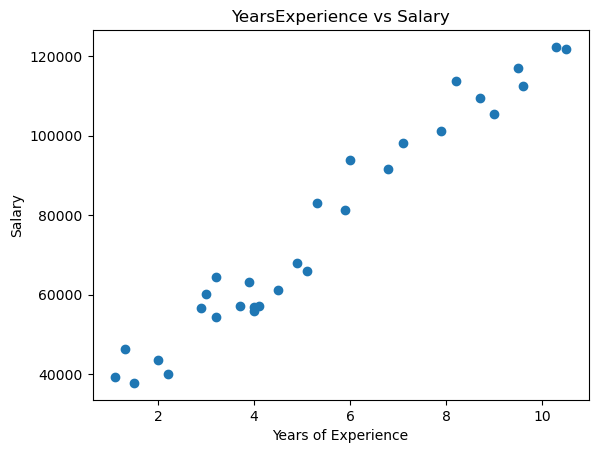

In [31]:
# Visualization of dataset
import matplotlib.pyplot as plt
plt.scatter(data=data_df, x='YearsExperience', y='Salary')
plt.title('YearsExperience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [32]:
# Correlation between variables
print('Correlation b/w Years of experience and Salary is', 
      data_df['YearsExperience'].corr(data_df['Salary']))

Correlation b/w Years of experience and Salary is 0.9782416184887599


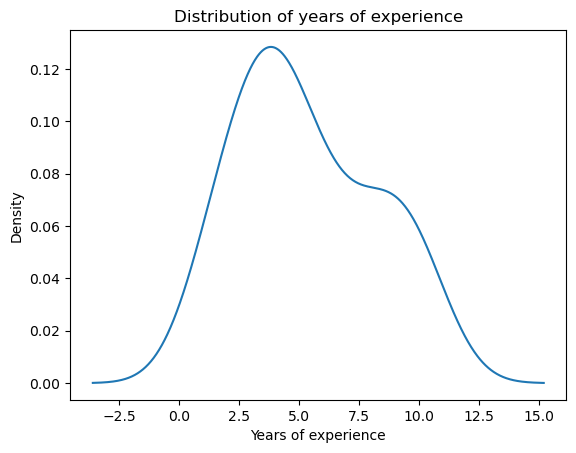

In [43]:
# Distribution of datas 
data_df['YearsExperience'].plot(kind='kde')
plt.title('Distribution of years of experience')
plt.xlabel('Years of experience')
plt.show()

In [46]:
print('Skewness in Years of experience data: ', data_df['YearsExperience'].skew())

Skewness in Years of experience data:  0.37956024064804106


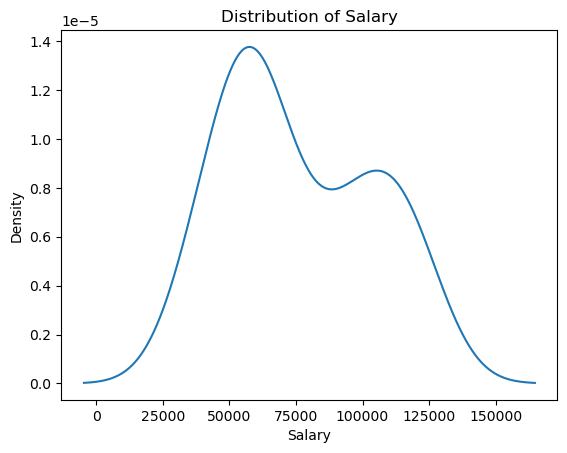

In [44]:
data_df['Salary'].plot(kind='kde')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.show()

In [45]:
print('Skewness in Salary data: ', data_df['Salary'].skew())

Skewness in Salary data:  0.35411967922959153


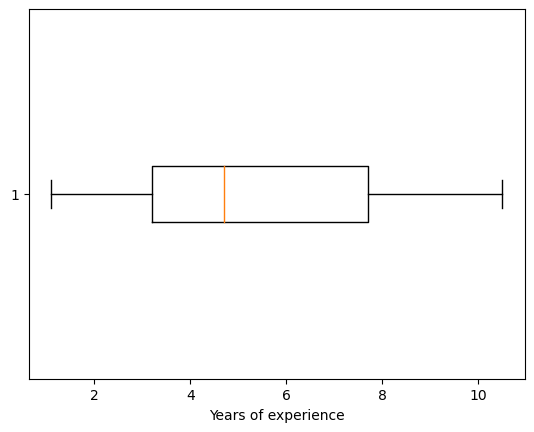

In [36]:
# Presence of outliers
plt.boxplot(data_df['YearsExperience'], vert=False)
plt.xlabel('Years of experience')
plt.show()

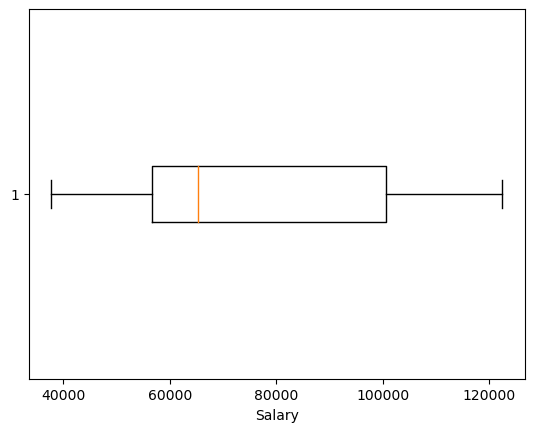

In [37]:
plt.boxplot(data_df['Salary'], vert=False)
plt.xlabel('Salary')
plt.show()

#### Machine Learning models fitting - Regression ML model

In [47]:
# Extraction of features

# Independent variable - predictor variable
x = pd.DataFrame(data_df['YearsExperience'])

# Dependent variable - explanatory variable
y = data_df['Salary']

In [48]:
# Training the model 
# a) Linear regression model
from sklearn.linear_model import LinearRegression

# Initialization of model
linear_model = LinearRegression()
linear_model.fit(x, y)
y_pred_lin = linear_model.predict(x)

# Score, intercept and coefficient of linear model
from sklearn.metrics import mean_squared_error

RMSE_lin = mean_squared_error(y_pred_lin, y)**0.5

print('Score for linear regression model: ', linear_model.score(x, y))
print('Root Mean squared Error: ', RMSE_lin)
print('Linear model intercept: ', linear_model.intercept_)
print('Linear model coefficient: ', linear_model.coef_)

Score for linear regression model:  0.9569566641435086
Root Mean squared Error:  5592.043608760662
Linear model intercept:  25792.20019866871
Linear model coefficient:  [9449.96232146]


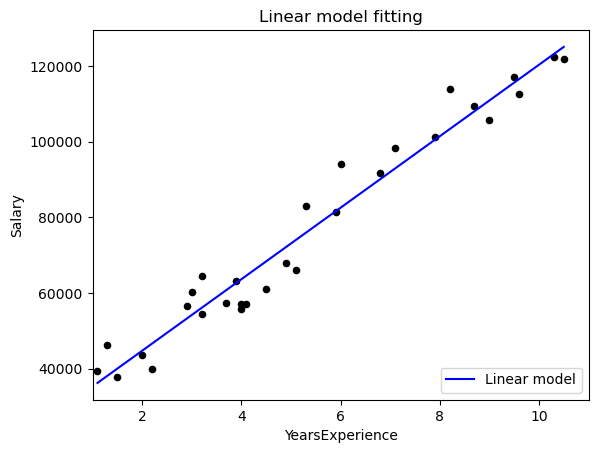

In [49]:
# Visualization of Linear model and dataset

# Dataset plotting
data_df.plot(kind='scatter', x='YearsExperience', y='Salary', color='black', xlim=(1, 11))

# Linear model plotting
plt.plot(x, y_pred_lin, color='blue', label='Linear model')
plt.title('Linear model fitting')
plt.legend(loc=4)
plt.show()

In [50]:
#b) Polynomial regression fitting 
import numpy as np

x_poly = pd.DataFrame([data_df['YearsExperience'],
                       data_df['YearsExperience'] ** 2,
                       data_df['YearsExperience'] ** 3,
                      data_df['YearsExperience'] ** 4,
                      data_df['YearsExperience'] ** 5,
                      data_df['YearsExperience'] ** 6,
                      data_df['YearsExperience'] ** 7,
                      data_df['YearsExperience'] ** 8,
                      data_df['YearsExperience'] ** 9,
                      data_df['YearsExperience'] ** 10,
                      data_df['YearsExperience'] ** 11,
                      data_df['YearsExperience'] ** 12]).T
y_poly = y

# Polynomial model initialization
poly_model = LinearRegression()
poly_model.fit(x_poly, y_poly)
y_poly_pred = poly_model.predict(x_poly)
RMSE_poly = mean_squared_error(y_poly_pred, y_poly)**0.5

# Score, intercept and coefficient of linear model
print('Score for Polynomial regression model: ', poly_model.score(x_poly, y_poly))
print('Root Mean squared Error: ', RMSE_poly)
print('Polynomial model intercept: ', poly_model.intercept_)
print('Polynomial model coefficient: ', poly_model.coef_)

Score for Polynomial regression model:  0.9830520831115623
Root Mean squared Error:  3508.9384587604004
Polynomial model intercept:  -568529.1563873291
Polynomial model coefficient:  [ 1.26575383e+06 -4.81212198e+05 -8.37115570e+05  1.11266279e+06
 -6.28078659e+05  2.08710964e+05 -4.46435110e+04  6.33053649e+03
 -5.92751801e+02  3.52686773e+01 -1.20896743e+00  1.81867754e-02]


C:\Users\umesh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


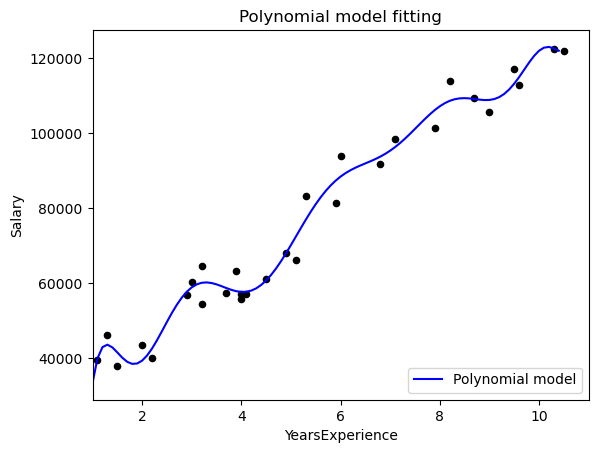

In [51]:
# Visualization of Polynomial model fitting and dataset

# Dataset plotting
data_df.plot(kind='scatter', x='YearsExperience', y='Salary', color='black', xlim=(1, 11))

# Polynomial model plotting
poly_range = np.arange(1, 10.5, 0.1)

X_poly_range = pd.DataFrame([poly_range,
                       poly_range ** 2,
                      poly_range ** 3,
                      poly_range ** 4,
                      poly_range ** 5,
                      poly_range ** 6,
                      poly_range ** 7,
                      poly_range ** 8,
                      poly_range ** 9,
                      poly_range ** 10,
                      poly_range ** 11,
                      poly_range ** 12]).T

y_poly_predicts = poly_model.predict(X_poly_range)

plt.plot(poly_range, y_poly_predicts, color='blue', label='Polynomial model')
plt.title('Polynomial model fitting')
plt.legend(loc=4)
plt.show()

In [52]:
#c) Linear regression fitting by scaling / transformation 
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
X_std = scaler.fit_transform(x)
y_std = scaler.fit_transform(pd.DataFrame(y))

# linear model initialization
linear_std_model = LinearRegression()
linear_std_model.fit(X_std, y_std)
y_std_predicts = linear_std_model.predict(X_std)
RMSE_std = mean_squared_error(y_std_predicts, y_std)**0.5

print('Score for scaled linear regression model: ', linear_std_model.score(X_std, y_std))
print('Root Mean squared Error: ', RMSE_std)

Score for scaled linear regression model:  0.9569566641435086
Root Mean squared Error:  0.20746887924816934
Scaled linear model intercept:  [2.20434161e-17]
Scaled linear model coefficient:  [[0.97824162]]


In [53]:
#d) Linear regression fitting by log transformation 
import numpy as np

x_log = np.log(x)
y_log = np.log(y)

# linear model initialization
log_std_model = LinearRegression()
log_std_model.fit(x_log, y_log)
y_log_predicts = log_std_model.predict(x_log)
RMSE_log = mean_squared_error(y_log_predicts, y_log)**0.5

# Score, intercept and coefficient of linear model
print('Score for log scaled linear regression model: ', log_std_model.score(x_log, y_log))
print('Root Mean squared Error: ', RMSE_log)

Score for log scaled linear regression model:  0.9052150725817151
Root Mean squared Error:  0.11163070330504787


In [54]:
#e) Linear regression fitting by square root transformation 
import numpy as np

x_sqrt = np.sqrt(x)
y_sqrt = np.sqrt(y)

# linear model initialization
sqrt_std_model = LinearRegression()
sqrt_std_model.fit(x_sqrt, y_sqrt)
y_sqrt_predicts = sqrt_std_model.predict(x_sqrt)
RMSE_sqrt = mean_squared_error(y_sqrt_predicts, y_sqrt)**0.5

# Score, intercept and coefficient of linear model
print('Score for Square root scaled linear regression model: ', sqrt_std_model.score(x_sqrt, y_sqrt))
print('Root Mean squared Error: ', RMSE_sqrt)

Score for Square root scaled linear regression model:  0.9419490138976824
Root Mean squared Error:  11.765354505779554


In [56]:
print('R2 score for differenet regression models - ')
print('Linear regression model: ', linear_model.score(x, y))
print('Polynomial regression model of degree 12: ', poly_model.score(x_poly, y_poly))
print('Standsr Scaled linear regression model: ', linear_std_model.score(X_std, y_std))
print('Log scaled linear regression model: ', log_std_model.score(x_log, y_log))
print('Square root scaled linear regression model: ', sqrt_std_model.score(x_sqrt, y_sqrt))
print()
print('Root Mean squared Error for different models - ')
print('Linear regression: ', RMSE_lin)
print('Polynomial regression: ', RMSE_poly)
print('Standard linear regression: ', RMSE_std)
print('Log scaled linear regression: ', RMSE_log)
print('Square root scaled linear regression: ', RMSE_sqrt)

R2 score for differenet regression models - 
Linear regression model:  0.9569566641435086
Polynomial regression model of degree 12:  0.9830520831115623
Standsr Scaled linear regression model:  0.9569566641435086
Log scaled linear regression model:  0.9052150725817151
Square root scaled linear regression model:  0.9419490138976824

Root Mean squared Error for different models - 
Linear regression:  5592.043608760662
Polynomial regression:  3508.9384587604004
Standard linear regression:  0.20746887924816934
Log scaled linear regression:  0.11163070330504787
Square root scaled linear regression:  11.765354505779554
